In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.5.0
Eager execution: True


In [4]:
# column order in CSV file
column_names = ["age","gender","scentLover","ecoInterest","washDishes","MrPropre","Antikal","Ariel","Dash","pods","powder","liquid","electricToothbrush","likesPets","hasPet","daysSinceActivity","nbChildren","magasin","moyenneSurface","superMarket","hyperMarket","drive","hardDiscount"]

feature_names = [c for c in column_names if c != 'washDishes']
label_name = column_names[4]

print(f"Features: {feature_names}")
print(f'Label: {label_name}')

Features: ['age', 'gender', 'scentLover', 'ecoInterest', 'MrPropre', 'Antikal', 'Ariel', 'Dash', 'pods', 'powder', 'liquid', 'electricToothbrush', 'likesPets', 'hasPet', 'daysSinceActivity', 'nbChildren', 'magasin', 'moyenneSurface', 'superMarket', 'hyperMarket', 'drive', 'hardDiscount']
Label: washDishes


In [5]:
batch_size = 256

train_dataset = tf.data.experimental.make_csv_dataset(
    r"DS_CentraleSupelec_ST42021/clean.csv",
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [6]:
features, labels = next(iter(train_dataset))
print(features)

 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0.], dtype=float32)>), ('liquid', <tf.Tensor: shape=(256,), dtype=float32, numpy=
array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.

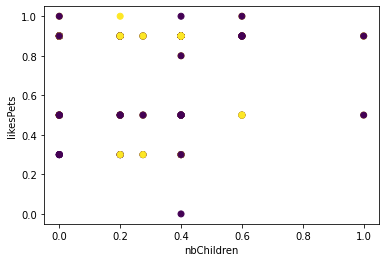

In [7]:
plt.scatter(features['nbChildren'],
            features['likesPets'],
            c=labels,
            cmap='viridis')

plt.xlabel("nbChildren")
plt.ylabel("likesPets")
plt.show()

In [8]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [9]:
train_dataset = train_dataset.map(pack_features_vector)

In [10]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[0.4025974  1.         0.         0.3886264  0.         0.
  0.         0.         1.         0.         0.         0.
  0.3        0.         0.19544742 0.4        0.         0.
  0.         0.         0.         0.        ]
 [0.25974026 1.         0.37898126 0.         0.         0.
  0.         0.         0.         0.         1.         1.
  0.9        1.         0.04081633 0.4        0.         1.
  0.         0.         0.         0.        ]
 [0.5974026  1.         0.37898126 0.3886264  0.         0.
  0.         0.         1.         0.         0.         0.
  0.5        0.         0.00863422 0.2        0.         0.
  0.         0.         0.         0.        ]
 [0.42857143 1.         1.         0.3886264  0.         0.
  0.         0.         0.         0.         0.         0.
  0.9        1.         0.01805338 0.4        0.         0.
  0.         0.         0.         0.        ]
 [0.06493507 1.         0.37898126 0.6666667  0.         0.
  0.         0.      

In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=tf.nn.relu, input_shape=(22,)),  # input shape required
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(30, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


In [12]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.49674723],
       [0.5333819 ],
       [0.49643904],
       [0.51668656],
       [0.506631  ]], dtype=float32)>

In [13]:
print("Prediction: {}".format(tf.transpose(predictions)[0]))
print("    Labels: {}".format(labels))

Prediction: [0.49674723 0.5333819  0.49643904 0.51668656 0.506631   0.49705365
 0.4984693  0.5289524  0.52758616 0.51088774 0.50814384 0.5328302
 0.5089968  0.49591547 0.52375036 0.524719   0.5060514  0.51367587
 0.49313942 0.51868707 0.52470523 0.5092359  0.5427586  0.5143
 0.4548887  0.5339825  0.49669927 0.5171704  0.49848983 0.53267175
 0.49613637 0.52144265 0.48075983 0.5021621  0.5088415  0.52528906
 0.5055035  0.5018641  0.5086248  0.5081768  0.52880114 0.51754355
 0.54108393 0.49456757 0.5171285  0.5041484  0.51397616 0.4899293
 0.50989866 0.51393515 0.51209295 0.5216865  0.5262217  0.5124954
 0.52186155 0.5360582  0.5266145  0.46331835 0.5150632  0.5217086
 0.5171238  0.52251315 0.50671506 0.5298446  0.517821   0.4976704
 0.5013955  0.51327795 0.51445377 0.52128017 0.49693167 0.51263934
 0.5027287  0.49980128 0.51894933 0.49977854 0.5006324  0.5348789
 0.5011706  0.49474847 0.5173244  0.52267313 0.49954093 0.5050708
 0.5072629  0.51406527 0.52059036 0.5062202  0.531907   0.524

In [14]:
loss_object = tf.keras.losses.BinaryCrossentropy()

In [15]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_pred = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_pred)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))


Loss test: 0.696642279624939


In [16]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)


In [18]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))


Step: 0, Initial Loss: 0.696642279624939
Step: 1,         Loss: 0.6796108484268188


In [19]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 300

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.BinaryAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 10 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))


Epoch 000: Loss: 0.665, Accuracy: 60.740%
Epoch 010: Loss: 0.637, Accuracy: 63.653%
Epoch 020: Loss: 0.621, Accuracy: 65.430%
Epoch 030: Loss: 0.599, Accuracy: 67.203%
Epoch 040: Loss: 0.575, Accuracy: 68.951%
Epoch 050: Loss: 0.550, Accuracy: 70.819%
Epoch 060: Loss: 0.538, Accuracy: 71.533%
Epoch 070: Loss: 0.517, Accuracy: 72.895%
Epoch 080: Loss: 0.513, Accuracy: 73.296%
Epoch 090: Loss: 0.507, Accuracy: 73.468%
Epoch 100: Loss: 0.491, Accuracy: 74.256%
Epoch 110: Loss: 0.484, Accuracy: 74.931%
Epoch 120: Loss: 0.470, Accuracy: 75.660%
Epoch 130: Loss: 0.479, Accuracy: 75.229%
Epoch 140: Loss: 0.457, Accuracy: 76.215%
Epoch 150: Loss: 0.452, Accuracy: 76.564%
Epoch 160: Loss: 0.444, Accuracy: 76.980%
Epoch 170: Loss: 0.449, Accuracy: 76.676%
Epoch 180: Loss: 0.437, Accuracy: 77.525%
Epoch 190: Loss: 0.438, Accuracy: 77.214%
Epoch 200: Loss: 0.433, Accuracy: 77.866%
Epoch 210: Loss: 0.431, Accuracy: 77.655%
Epoch 220: Loss: 0.449, Accuracy: 77.020%
Epoch 230: Loss: 0.418, Accuracy: 

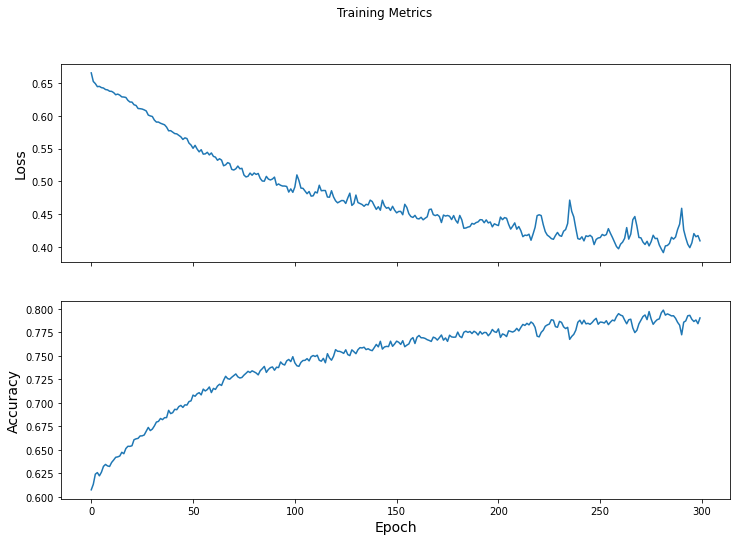

In [20]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [21]:
import pandas as pd
df = pd.read_csv(r"DS_CentraleSupelec_ST42021/testClean.csv")

In [22]:
def predictRow(row):
    tensor = tf.convert_to_tensor([[x for x in row[1:]]])
    predictions = model(tensor)
    return 'Auto' if predictions > 0.5 else 'Hand'
    
r = pd.DataFrame()


r["userId"] = df["userId"]
r["washDishes"] = df.apply(predictRow, axis=1)

r.to_csv('./data/submission.csv', index=False)  